In [1]:
import pandas as pd

### Load and process sensor readings

In [2]:
sensor_readings = pd.read_csv("speed_readings.csv")
sensor_readings = sensor_readings.pivot(index="Timestamp", columns="sensor_id", values="measurement")
sensor_readings

sensor_id,716328,716331,716337,716339,716554,716571,716939,716941,716942,716943,...,773953,773954,773974,773975,773995,773996,774011,774012,774067,774204
Timestamp,,,,,,,,,,,,,,,,,,,,,
2012-03-01 00:00:00,66.875000,67.500000,63.125000,64.250000,63.500000,67.000000,53.625000,58.125000,62.125000,55.000,...,55.750000,63.875000,52.125000,64.750000,63.125000,61.375000,67.750000,55.875000,52.500000,64.500000
2012-03-01 00:05:00,67.444444,65.444444,63.777778,66.444444,56.000000,65.888889,59.888889,56.222222,62.000000,50.000,...,60.888889,62.333333,52.333333,62.222222,58.555556,58.666667,64.111111,66.444444,34.666667,66.666667
2012-03-01 00:10:00,65.000000,67.875000,63.875000,64.750000,59.125000,61.375000,56.000000,59.125000,63.125000,54.875,...,62.375000,61.500000,56.125000,63.500000,64.125000,59.500000,67.125000,65.750000,50.000000,56.500000
2012-03-01 00:15:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2012-03-01 00:20:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-06-27 23:35:00,66.333333,64.333333,65.777778,63.444444,59.888889,59.555556,53.444444,60.333333,57.000000,53.000,...,62.666667,62.555556,54.777778,64.888889,58.222222,60.444444,66.666667,64.888889,61.777778,65.111111
2012-06-27 23:40:00,63.750000,64.250000,66.125000,63.125000,55.750000,66.750000,56.500000,59.125000,58.125000,51.625,...,62.500000,62.875000,52.500000,63.500000,65.250000,65.125000,65.750000,67.875000,62.625000,60.125000
2012-06-27 23:45:00,66.888889,59.000000,64.444444,64.444444,55.333333,68.333333,52.222222,61.333333,65.333333,55.000,...,59.888889,63.333333,53.222222,64.333333,65.555556,62.888889,67.444444,67.888889,60.333333,64.333333


## Imputation

### Split train/val, and scale

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import StandardScaler
import joblib

def split_scale(measurements, feature, cluster):

    # Step 1: Split the full data (X_seq or X_ori) into train and validation sets
    X_train_full, X_val_full = train_test_split(measurements, test_size=0.2, shuffle = False, random_state=42)

    scaler = StandardScaler()

    # Fit and transform training data
    X_train_full_scaled = X_train_full.copy()
    X_train_full_scaled = scaler.fit_transform(X_train_full)
    X_train_full_scaled = pd.DataFrame(X_train_full_scaled, columns=X_train_full.columns, index=X_train_full.index)

    # Save scaler with specific name for later rescaling
    joblib.dump(scaler, f"{feature}_scaler_{cluster}.pkl")

    # Now, apply ONLY transformation (not fitting) on val data
    X_val_full_scaled = X_val_full.copy()
    X_val_full_scaled = scaler.transform(X_val_full)
    X_val_full_scaled = pd.DataFrame(X_val_full_scaled, columns=X_val_full.columns, index=X_val_full.index)

    return X_train_full_scaled, X_val_full_scaled, X_train_full, X_val_full

In [4]:
speeds_c0 = sensor_readings[[716328, 716331, 716337, 716339, 716571, 716939, 716941, 716942, 716943, 716949, 716951, 716953, 716955, 716956, 716958, 716960, 717445, 717446, 717447, 717450, 717452, 717453, 717456, 717458, 717459, 717460, 717461, 717462, 717463, 717465, 717466, 717468, 717469, 717472, 717473, 717480, 717481, 717483, 717486, 717488, 717489, 717490, 717491, 717492, 717493, 717495, 717497, 717498, 717499, 717502, 717504, 717508, 717510, 717513, 717570, 717571, 717572, 717573, 717576, 717578, 717592, 717595, 717608, 717610, 717804, 717816, 717818, 717819, 717821, 717823, 717825, 718045, 718064, 718066, 718072, 718089, 718090, 718141, 718204, 718371, 718379, 718499, 737529]]
speeds_c1 =  sensor_readings[[769345, 769346, 769358, 769359, 769372, 769373, 769388, 769402, 769403, 769405, 769418, 769430, 769431, 769443, 769444, 769467, 771667, 771673, 772140, 772151, 772167, 772168, 772178, 772513, 772596, 772597, 772669, 773012, 773013, 773023, 773024, 773062, 773869, 773880, 773904, 773906, 773916, 773927, 773939, 773953, 773954, 773974, 773975, 773995, 773996, 774011, 774012, 774067]]
speeds_c2 = sensor_readings[[759591, 759602, 760024, 760650, 761003, 761599, 761604, 762329, 763995, 764101, 764106, 764120, 764424, 764760, 764766, 764781, 764794, 764853, 764858, 764949, 765099, 765164, 765171, 765176, 765182, 765265, 765273, 765604, 767053, 767350, 767351, 767366, 767454, 767455, 767494, 767495, 767509, 767523, 767541, 767542, 767554, 767572, 767573, 767620, 767621, 767750, 767751, 768066, 768469]]
speeds_all = sensor_readings.copy()

# Initialize the containers
X_train_full_scaled = {}
X_val_full_scaled = {}
X_train_full_unscaled = {}
X_val_full_unscaled = {}
clusters = [speeds_c0, speeds_c1, speeds_c2, speeds_all]

# Iterate over the clusters
for i, flow_cluster in enumerate(clusters):
    X_train_full_scaled[i], X_val_full_scaled[i], X_train_full_unscaled[i], X_val_full_unscaled[i] = split_scale(flow_cluster, "speed", i)

In [5]:
X_train_full_scaled[1]

sensor_id,769345,769346,769358,769359,769372,769373,769388,769402,769403,769405,...,773939,773953,773954,773974,773975,773995,773996,774011,774012,774067
Timestamp,,,,,,,,,,,,,,,,,,,,,
2012-03-01 00:00:00,0.686119,0.552111,0.720071,0.509519,0.332267,0.476704,0.333409,0.417810,0.374391,0.759628,...,0.571499,0.027902,0.442671,-0.068183,0.269287,0.279438,0.265665,0.353572,-0.332757,-0.152326
2012-03-01 00:05:00,0.820647,0.701854,0.702033,0.792156,0.552466,0.525629,0.484914,0.659686,0.289010,0.561899,...,0.810589,0.339414,0.342273,-0.052679,0.105760,0.004178,0.098432,0.142309,0.273987,-1.073832
2012-03-01 00:10:00,0.800468,0.737999,0.734188,0.461001,0.508426,0.482820,0.511263,0.592264,0.483131,0.811023,...,0.340948,0.429500,0.288004,0.229505,0.188422,0.339677,0.149888,0.317287,0.234122,-0.281509
2012-03-01 00:15:00,-2.838507,-2.880178,-2.886868,-2.824367,-2.964422,-2.550522,-3.098513,-3.351912,-3.525756,-2.047833,...,-2.239028,-3.351575,-3.717078,-3.947432,-3.919539,-3.523162,-3.524103,-3.579790,-3.540285,-2.865170
2012-03-01 00:20:00,-2.838507,-2.880178,-2.886868,-2.824367,-2.964422,-2.550522,-3.098513,-3.351912,-3.525756,-2.047833,...,-2.239028,-3.351575,-3.717078,-3.947432,-3.919539,-3.523162,-3.524103,-3.579790,-3.540285,-2.865170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-06-04 04:20:00,0.322894,0.492361,0.310673,0.599624,0.300810,0.599016,0.419043,0.561924,0.367142,0.605442,...,-0.169558,0.520427,-0.062034,0.843487,0.139903,0.445095,0.010956,-0.023798,-0.124662,-0.442988
2012-06-04 04:25:00,0.288515,0.471707,0.388317,0.311596,0.318286,0.586106,0.402941,0.234929,0.192352,0.641847,...,0.098199,0.366355,-0.272780,0.311162,-0.181762,0.211668,-0.025064,0.045548,0.089014,-0.011660
2012-06-04 04:30:00,0.242178,0.339668,0.190677,0.336240,0.458095,0.592901,0.274125,0.304036,0.280150,0.631140,...,-0.087218,0.399190,0.003089,0.248110,0.059037,0.286967,0.327413,0.222944,0.155190,-0.920965


In [6]:
def sliding_window_3d(data, window_size, stride):
    """
    Converts a long time series [1, T, F] into [N, window_size, F]
    """
    data = data.squeeze(0)  # [T, F]
    total_steps, n_features = data.shape
    windows = []

    for i in range(0, total_steps - window_size + 1, stride):
        window = data[i:i+window_size]
        windows.append(window)

    return np.stack(windows)

### Introduce MCAR Missingness

In [7]:
from pygrinder import mcar

missing_rates = [0.05, 0.2, 0.6, 0.90]

# Training and validation sets for each cluster
X_train_incomplete = {}
X_val_incomplete = {}
train_masks = {}
val_masks = {}
X_train_seq = {}
X_val_seq = {}
train_masks_seq = {}
val_masks_seq = {}

# Full tensors for each cluster
X_train_full_tensor = {}
X_val_full_tensor = {}
X_val_full_seq = {}
X_train_full_seq = {}
X_train_full_unscaled_seq_tensor = {}
X_val_full_unscaled_seq_tensor = {}


n_steps = 1008 # 3.5 days each window
stride = 288 # 1 day stride

for cluster_id, flow_cluster in enumerate(clusters):
    X_train_incomplete[cluster_id] = {}
    X_val_incomplete[cluster_id] = {}
    train_masks[cluster_id] = {}
    val_masks[cluster_id] = {}
    X_train_seq[cluster_id] = {}
    X_val_seq[cluster_id] = {}
    train_masks_seq[cluster_id] = {}
    val_masks_seq[cluster_id] = {}

    for rate in missing_rates:
        key = int(rate * 100)

        # Introduce missingness per cluster & rate
        print(f"Introducing {rate*100}% missingness for cluster {cluster_id} with key {key}")
        X_train_incomplete[cluster_id][key] = mcar(X_train_full_scaled[cluster_id].values, p=rate)
        X_val_incomplete[cluster_id][key] = mcar(X_val_full_scaled[cluster_id].values, p=rate)

        # Masks for missingness
        train_masks[cluster_id][key] = np.isnan(X_train_incomplete[cluster_id][key])
        val_masks[cluster_id][key] = np.isnan(X_val_incomplete[cluster_id][key])

        # Expand dims for batch axis (needed for sliding window)
        X_train_tensor = np.expand_dims(X_train_incomplete[cluster_id][key], axis=0)
        X_val_tensor = np.expand_dims(X_val_incomplete[cluster_id][key], axis=0)
        train_mask_tensor = np.expand_dims(train_masks[cluster_id][key], axis=0)
        val_mask_tensor = np.expand_dims(val_masks[cluster_id][key], axis=0)

        # Sliding window on data
        X_train_seq[cluster_id][key] = sliding_window_3d(X_train_tensor, window_size=n_steps, stride=stride)
        X_val_seq[cluster_id][key] = sliding_window_3d(X_val_tensor, window_size=n_steps, stride=stride)

        # Sliding window on masks
        train_masks_seq[cluster_id][key] = sliding_window_3d(train_mask_tensor, window_size=n_steps, stride=stride)
        val_masks_seq[cluster_id][key] = sliding_window_3d(val_mask_tensor, window_size=n_steps, stride=stride)


    # Expand full training tensors
    X_train_full_tensor[cluster_id] = np.expand_dims(X_train_full_scaled[cluster_id].values, axis = 0)

    # Expand full validation tensors
    X_val_full_tensor[cluster_id] = np.expand_dims(X_val_full_scaled[cluster_id].values, axis = 0)

    # Convert scaled data to tensor
    X_val_full_seq[cluster_id] = sliding_window_3d(X_val_full_tensor[cluster_id], window_size=n_steps, stride=stride)
    X_train_full_seq[cluster_id] = sliding_window_3d(X_train_full_tensor[cluster_id], window_size=n_steps, stride=stride)

    # Convert unscaled data to tensor
    X_train_full_unscaled_values = np.expand_dims(X_train_full_unscaled[cluster_id].values, axis=0)
    X_train_full_unscaled_seq_tensor[cluster_id] = sliding_window_3d(X_train_full_unscaled_values, window_size=n_steps, stride=stride)

    X_val_full_unscaled_values = np.expand_dims(X_val_full_unscaled[cluster_id].values, axis=0)
    X_val_full_unscaled_seq_tensor[cluster_id] = sliding_window_3d(X_val_full_unscaled_values, window_size=n_steps, stride=stride)

Introducing 5.0% missingness for cluster 0 with key 5
Introducing 20.0% missingness for cluster 0 with key 20
Introducing 60.0% missingness for cluster 0 with key 60
Introducing 90.0% missingness for cluster 0 with key 90
Introducing 5.0% missingness for cluster 1 with key 5
Introducing 20.0% missingness for cluster 1 with key 20
Introducing 60.0% missingness for cluster 1 with key 60
Introducing 90.0% missingness for cluster 1 with key 90
Introducing 5.0% missingness for cluster 2 with key 5
Introducing 20.0% missingness for cluster 2 with key 20
Introducing 60.0% missingness for cluster 2 with key 60
Introducing 90.0% missingness for cluster 2 with key 90
Introducing 5.0% missingness for cluster 3 with key 5
Introducing 20.0% missingness for cluster 3 with key 20
Introducing 60.0% missingness for cluster 3 with key 60
Introducing 90.0% missingness for cluster 3 with key 90


In [8]:
# Step 3: Prepare the final datasets with 'X' (incomplete) and 'X_ori' (full data)

# 20 percent missing
train_data, val_data = {}, {}

for cluster_id in range(len(clusters)):
    train_data[cluster_id] = {}
    val_data[cluster_id] = {}
    
    for rate in missing_rates:
        key = int(rate * 100)
        
        # Prepare the train and validation data dictionaries for each missing rate
        train_data[cluster_id][key] = {"X": X_train_seq[cluster_id][key]}
        val_data[cluster_id][key] = {"X": X_val_seq[cluster_id][key], "X_ori": X_val_full_seq[cluster_id]}

In [9]:
def mean_impute(X_incomplete):
    """
    Impute missing values using feature-wise mean over the entire dataset.
    Assumes input shape is [n_samples, n_steps, n_features].
    """
    X_imputed = X_incomplete.copy()
    n_features = X_imputed.shape[2]

    for f in range(n_features):
        feature_data = X_imputed[:, :, f]
        mean_val = np.nanmean(feature_data)
        feature_data[np.isnan(feature_data)] = mean_val
        X_imputed[:, :, f] = feature_data

    return X_imputed


In [10]:
# Dictionary to hold results
mean_imputed_results = {}
missing_masks = {}

for cluster_idx, cluster_data in enumerate(X_val_seq):
    mean_imputed_results[cluster_idx] = {}
    missing_masks[cluster_idx] = {}
    
    for rate in missing_rates:
        key = int(rate * 100)
        X_missing = X_val_seq[cluster_idx][key]
        
        # Impute using mean
        X_imputed = mean_impute(X_missing)
        mean_imputed_results[cluster_idx][key] = X_imputed

        # Create missing mask
        missing_mask = np.isnan(X_missing)
        missing_masks[cluster_idx][key] = missing_mask


In [11]:
import joblib

imputed_unscaled_mean = {}

for cluster_id in range(len(clusters)):
    imputed_unscaled_mean[cluster_id] = {}
    
    scaler = joblib.load(f"speed_scaler_{cluster_id}.pkl")
    print(f"{type(scaler)}")

# Unscale the imputed values for each cluster and missing rate
    for rate in missing_rates:
        key = int(rate * 100)
        n_samples, n_steps, n_features = mean_imputed_results[cluster_id][key].shape
        tensor_2d = mean_imputed_results[cluster_id][key].reshape(-1, n_features)  # Flatten time dimension
        tensor_2d_unscaled = scaler.inverse_transform(tensor_2d)
        imputed_unscaled_mean[cluster_id][key] = tensor_2d_unscaled.reshape(n_samples, n_steps, n_features)

<class 'sklearn.preprocessing._data.StandardScaler'>
<class 'sklearn.preprocessing._data.StandardScaler'>
<class 'sklearn.preprocessing._data.StandardScaler'>
<class 'sklearn.preprocessing._data.StandardScaler'>


In [12]:
# Calculate MAE for imputation evaluation

# Calculate MAE for imputation evaluation

mae_mean = {}
for cluster_id in range(len(clusters)):
    mae_mean[cluster_id] = {}

    for rate in missing_rates:
        key = int(rate * 100)
        mae_mean[cluster_id][key] = np.mean(np.abs(imputed_unscaled_mean[cluster_id][key][val_masks_seq[cluster_id][key]] - X_val_full_unscaled_seq_tensor[cluster_id][val_masks_seq[cluster_id][key]]))
        print(f"MAE Cluster {cluster_id} Rate {rate*100}% (MAE): {mae_mean[cluster_id][key]}")

MAE Cluster 0 Rate 5.0% (MAE): 18.768210104934493
MAE Cluster 0 Rate 20.0% (MAE): 18.603085576641313
MAE Cluster 0 Rate 60.0% (MAE): 18.58477311487941
MAE Cluster 0 Rate 90.0% (MAE): 18.592964027470913
MAE Cluster 1 Rate 5.0% (MAE): 16.993139092888022
MAE Cluster 1 Rate 20.0% (MAE): 16.923568150100564
MAE Cluster 1 Rate 60.0% (MAE): 16.970333746071628
MAE Cluster 1 Rate 90.0% (MAE): 17.004925065768465
MAE Cluster 2 Rate 5.0% (MAE): 16.123073742583685
MAE Cluster 2 Rate 20.0% (MAE): 16.232266641944857
MAE Cluster 2 Rate 60.0% (MAE): 16.261441598544664
MAE Cluster 2 Rate 90.0% (MAE): 16.186557703692337
MAE Cluster 3 Rate 5.0% (MAE): 17.130658993629034
MAE Cluster 3 Rate 20.0% (MAE): 17.14326737657838
MAE Cluster 3 Rate 60.0% (MAE): 17.158354665286584
MAE Cluster 3 Rate 90.0% (MAE): 17.158259119910152


In [13]:
#SMAPE for each percentage of missingness
smape = {}
for cluster_id in range(len(clusters)):
    smape[cluster_id] = {}
    for rate in missing_rates:
        key = int(rate * 100)
        numerator = np.abs((imputed_unscaled_mean[cluster_id][key][val_masks_seq[cluster_id][key]] - X_val_full_unscaled_seq_tensor[cluster_id][val_masks_seq[cluster_id][key]]))
        denominator = np.abs(imputed_unscaled_mean[cluster_id][key][val_masks_seq[cluster_id][key]]) + np.abs(X_val_full_unscaled_seq_tensor[cluster_id][val_masks_seq[cluster_id][key]]) + 1e-8
        smape[cluster_id][key] = 100 * np.mean(2 * numerator / denominator)
        print(f"SMAPE Cluster {cluster_id} Rate {rate*100}%: {smape[cluster_id][key]:.2f}%")

SMAPE Cluster 0 Rate 5.0%: 53.92%
SMAPE Cluster 0 Rate 20.0%: 53.08%
SMAPE Cluster 0 Rate 60.0%: 53.05%
SMAPE Cluster 0 Rate 90.0%: 53.05%
SMAPE Cluster 1 Rate 5.0%: 49.83%
SMAPE Cluster 1 Rate 20.0%: 49.27%
SMAPE Cluster 1 Rate 60.0%: 49.58%
SMAPE Cluster 1 Rate 90.0%: 49.73%
SMAPE Cluster 2 Rate 5.0%: 42.63%
SMAPE Cluster 2 Rate 20.0%: 42.97%
SMAPE Cluster 2 Rate 60.0%: 43.21%
SMAPE Cluster 2 Rate 90.0%: 43.02%
SMAPE Cluster 3 Rate 5.0%: 47.85%
SMAPE Cluster 3 Rate 20.0%: 48.05%
SMAPE Cluster 3 Rate 60.0%: 48.09%
SMAPE Cluster 3 Rate 90.0%: 48.09%


In [14]:
from pypots.imputation import BRITS
from pypots.nn.modules.loss import MAE, MSE
from pypots.optim.adam import Adam
import torch

def intialize_BRITS(n_steps, num_features, rnn_hidden_size):

    # Basic configuration
    model = BRITS(
        n_steps=n_steps,
        n_features=num_features,
        rnn_hidden_size=rnn_hidden_size,               # Reasonable hidden size
        batch_size=32,                    # Standard for most datasets
        epochs=25,                       # Higher epochs for better convergence
        patience=5,                      # Early stopping if no improvement
        training_loss=MAE,                # MAE often performs well for imputation
        validation_metric=MSE,           # Use MSE for validation comparison
        optimizer=Adam,                   # Adam optimizer (default)
        num_workers=0,                    # Adjust if using DataLoader with multiprocessing
        device="cuda" if torch.cuda.is_available() else "cpu",  # Use GPU if available
        saving_path="./brits_model",     # Directory to save model checkpoints
        model_saving_strategy="best",    # Save best model only
        verbose=True                      # Print training progress
    )

    return model

d:\anaconda3\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm



████████╗██╗███╗   ███╗███████╗    ███████╗███████╗██████╗ ██╗███████╗███████╗    █████╗ ██╗
╚══██╔══╝██║████╗ ████║██╔════╝    ██╔════╝██╔════╝██╔══██╗██║██╔════╝██╔════╝   ██╔══██╗██║
   ██║   ██║██╔████╔██║█████╗█████╗███████╗█████╗  ██████╔╝██║█████╗  ███████╗   ███████║██║
   ██║   ██║██║╚██╔╝██║██╔══╝╚════╝╚════██║██╔══╝  ██╔══██╗██║██╔══╝  ╚════██║   ██╔══██║██║
   ██║   ██║██║ ╚═╝ ██║███████╗    ███████║███████╗██║  ██║██║███████╗███████║██╗██║  ██║██║
   ╚═╝   ╚═╝╚═╝     ╚═╝╚══════╝    ╚══════╝╚══════╝╚═╝  ╚═╝╚═╝╚══════╝╚══════╝╚═╝╚═╝  ╚═╝╚═╝
ai4ts v0.0.3 - building AI for unified time-series analysis, https://time-series.ai 



In [ ]:
models = {}
rnn_hidden = 0
# Initialize and fit BRITS models for each missing rate

for cluster_id in range(len(clusters)):
    print(f"Training BRITS models for cluster {cluster_id}...")
    models[cluster_id] = {}
    for rate in missing_rates:
        print(f"Training model for missing rate {rate} in cluster {cluster_id}...")
        key = int(rate * 100)

        _, n_steps, n_features = train_data[cluster_id][key]["X"].shape
        
        # Reduce complexity of model for less features
        #if cluster_id != len(clusters) - 1:
        #    rnn_hidden = 16
        #else:
        rnn_hidden = 16
        
        models[cluster_id][key] = intialize_BRITS(n_steps, n_features, rnn_hidden)
        models[cluster_id][key].fit(train_data[cluster_id][key], val_set=val_data[cluster_id][key])

2025-06-19 11:15:31 [INFO]: Using the given device: cpu
2025-06-19 11:15:31 [INFO]: Model files will be saved to ./brits_model\20250619_T111531
2025-06-19 11:15:31 [INFO]: Tensorboard file will be saved to ./brits_model\20250619_T111531\tensorboard
2025-06-19 11:15:31 [INFO]: Using customized MAE as the training loss function.
2025-06-19 11:15:31 [INFO]: Using customized MSE as the validation metric function.
2025-06-19 11:15:31 [INFO]: BRITS initialized with the given hyperparameters, the number of trainable parameters: 117,664


Training BRITS models for cluster 0...
Training model for missing rate 0.05 in cluster 0...


2025-06-19 11:15:55 [INFO]: Epoch 001 - training loss (MAE): 1.4648, validation MSE: 1.3725
2025-06-19 11:16:15 [INFO]: Epoch 002 - training loss (MAE): 1.3451, validation MSE: 1.1530
2025-06-19 11:16:35 [INFO]: Epoch 003 - training loss (MAE): 1.2424, validation MSE: 0.9982
2025-06-19 11:16:53 [INFO]: Epoch 004 - training loss (MAE): 1.1672, validation MSE: 0.8933
2025-06-19 11:17:12 [INFO]: Epoch 005 - training loss (MAE): 1.1123, validation MSE: 0.8232
2025-06-19 11:17:32 [INFO]: Epoch 006 - training loss (MAE): 1.0656, validation MSE: 0.7697
2025-06-19 11:17:50 [INFO]: Epoch 007 - training loss (MAE): 1.0286, validation MSE: 0.7322
2025-06-19 11:18:09 [INFO]: Epoch 008 - training loss (MAE): 1.0013, validation MSE: 0.7039
2025-06-19 11:18:31 [INFO]: Epoch 009 - training loss (MAE): 0.9731, validation MSE: 0.6794
2025-06-19 11:18:55 [INFO]: Epoch 010 - training loss (MAE): 0.9519, validation MSE: 0.6560
2025-06-19 11:19:19 [INFO]: Epoch 011 - training loss (MAE): 0.9327, validation 

Training model for missing rate 0.2 in cluster 0...


2025-06-19 11:24:06 [INFO]: Epoch 001 - training loss (MAE): 1.4671, validation MSE: 1.4028
2025-06-19 11:24:24 [INFO]: Epoch 002 - training loss (MAE): 1.3701, validation MSE: 1.2151
2025-06-19 11:24:43 [INFO]: Epoch 003 - training loss (MAE): 1.2767, validation MSE: 1.0709
2025-06-19 11:25:01 [INFO]: Epoch 004 - training loss (MAE): 1.2013, validation MSE: 0.9711
2025-06-19 11:25:20 [INFO]: Epoch 005 - training loss (MAE): 1.1363, validation MSE: 0.8973
2025-06-19 11:25:39 [INFO]: Epoch 006 - training loss (MAE): 1.0868, validation MSE: 0.8394
2025-06-19 11:25:57 [INFO]: Epoch 007 - training loss (MAE): 1.0488, validation MSE: 0.7938
2025-06-19 11:26:17 [INFO]: Epoch 008 - training loss (MAE): 1.0174, validation MSE: 0.7547
2025-06-19 11:26:35 [INFO]: Epoch 009 - training loss (MAE): 0.9928, validation MSE: 0.7262
2025-06-19 11:26:53 [INFO]: Epoch 010 - training loss (MAE): 0.9727, validation MSE: 0.7010
2025-06-19 11:27:10 [INFO]: Epoch 011 - training loss (MAE): 0.9525, validation 

Training model for missing rate 0.6 in cluster 0...


2025-06-19 11:31:55 [INFO]: Epoch 001 - training loss (MAE): 1.4503, validation MSE: 1.4932
2025-06-19 11:32:13 [INFO]: Epoch 002 - training loss (MAE): 1.4011, validation MSE: 1.3910
2025-06-19 11:32:29 [INFO]: Epoch 003 - training loss (MAE): 1.3370, validation MSE: 1.2923
2025-06-19 11:32:45 [INFO]: Epoch 004 - training loss (MAE): 1.2771, validation MSE: 1.2008
2025-06-19 11:33:02 [INFO]: Epoch 005 - training loss (MAE): 1.2022, validation MSE: 1.1183
2025-06-19 11:33:19 [INFO]: Epoch 006 - training loss (MAE): 1.1480, validation MSE: 1.0528
2025-06-19 11:33:35 [INFO]: Epoch 007 - training loss (MAE): 1.1153, validation MSE: 0.9972
2025-06-19 11:33:52 [INFO]: Epoch 008 - training loss (MAE): 1.0825, validation MSE: 0.9439
2025-06-19 11:34:09 [INFO]: Epoch 009 - training loss (MAE): 1.0540, validation MSE: 0.8959
2025-06-19 11:34:26 [INFO]: Epoch 010 - training loss (MAE): 1.0252, validation MSE: 0.8526
2025-06-19 11:34:42 [INFO]: Epoch 011 - training loss (MAE): 1.0092, validation 

Training model for missing rate 0.9 in cluster 0...


2025-06-19 11:39:41 [INFO]: Epoch 001 - training loss (MAE): 1.4501, validation MSE: 1.5580
2025-06-19 11:40:00 [INFO]: Epoch 002 - training loss (MAE): 1.4213, validation MSE: 1.5479
2025-06-19 11:40:20 [INFO]: Epoch 003 - training loss (MAE): 1.3909, validation MSE: 1.5363
2025-06-19 11:40:40 [INFO]: Epoch 004 - training loss (MAE): 1.3542, validation MSE: 1.5227
2025-06-19 11:40:59 [INFO]: Epoch 005 - training loss (MAE): 1.2992, validation MSE: 1.5149
2025-06-19 11:41:18 [INFO]: Epoch 006 - training loss (MAE): 1.2458, validation MSE: 1.5393
2025-06-19 11:41:37 [INFO]: Epoch 007 - training loss (MAE): 1.2215, validation MSE: 1.5318
2025-06-19 11:41:57 [INFO]: Epoch 008 - training loss (MAE): 1.1855, validation MSE: 1.4916
2025-06-19 11:42:18 [INFO]: Epoch 009 - training loss (MAE): 1.1506, validation MSE: 1.4544
2025-06-19 11:42:37 [INFO]: Epoch 010 - training loss (MAE): 1.1358, validation MSE: 1.4235
2025-06-19 11:42:56 [INFO]: Epoch 011 - training loss (MAE): 1.1190, validation 

Training BRITS models for cluster 1...
Training model for missing rate 0.05 in cluster 1...


2025-06-19 11:47:45 [INFO]: Epoch 001 - training loss (MAE): 1.4484, validation MSE: 1.6838
2025-06-19 11:48:03 [INFO]: Epoch 002 - training loss (MAE): 1.3726, validation MSE: 1.4946
2025-06-19 11:48:20 [INFO]: Epoch 003 - training loss (MAE): 1.2904, validation MSE: 1.3420
2025-06-19 11:48:37 [INFO]: Epoch 004 - training loss (MAE): 1.2200, validation MSE: 1.2214
2025-06-19 11:48:53 [INFO]: Epoch 005 - training loss (MAE): 1.1582, validation MSE: 1.1313
2025-06-19 11:49:10 [INFO]: Epoch 006 - training loss (MAE): 1.1064, validation MSE: 1.0633
2025-06-19 11:49:27 [INFO]: Epoch 007 - training loss (MAE): 1.0611, validation MSE: 1.0083
2025-06-19 11:49:43 [INFO]: Epoch 008 - training loss (MAE): 1.0244, validation MSE: 0.9596
2025-06-19 11:50:00 [INFO]: Epoch 009 - training loss (MAE): 0.9902, validation MSE: 0.9167
2025-06-19 11:50:17 [INFO]: Epoch 010 - training loss (MAE): 0.9582, validation MSE: 0.8779
2025-06-19 11:50:34 [INFO]: Epoch 011 - training loss (MAE): 0.9319, validation 

Training model for missing rate 0.2 in cluster 1...


2025-06-19 11:55:08 [INFO]: Epoch 001 - training loss (MAE): 1.4079, validation MSE: 1.5485
2025-06-19 11:55:25 [INFO]: Epoch 002 - training loss (MAE): 1.3340, validation MSE: 1.4022
2025-06-19 11:55:42 [INFO]: Epoch 003 - training loss (MAE): 1.2752, validation MSE: 1.2761
2025-06-19 11:55:58 [INFO]: Epoch 004 - training loss (MAE): 1.2131, validation MSE: 1.1662
2025-06-19 11:56:15 [INFO]: Epoch 005 - training loss (MAE): 1.1538, validation MSE: 1.0711
2025-06-19 11:56:31 [INFO]: Epoch 006 - training loss (MAE): 1.1040, validation MSE: 0.9956
2025-06-19 11:56:48 [INFO]: Epoch 007 - training loss (MAE): 1.0592, validation MSE: 0.9340
2025-06-19 11:57:05 [INFO]: Epoch 008 - training loss (MAE): 1.0209, validation MSE: 0.8834
2025-06-19 11:57:21 [INFO]: Epoch 009 - training loss (MAE): 0.9853, validation MSE: 0.8407
2025-06-19 11:57:38 [INFO]: Epoch 010 - training loss (MAE): 0.9572, validation MSE: 0.8068
2025-06-19 11:57:54 [INFO]: Epoch 011 - training loss (MAE): 0.9360, validation 

Training model for missing rate 0.6 in cluster 1...


2025-06-19 12:02:14 [INFO]: Epoch 001 - training loss (MAE): 1.4304, validation MSE: 1.6574
2025-06-19 12:02:32 [INFO]: Epoch 002 - training loss (MAE): 1.3901, validation MSE: 1.5862
2025-06-19 12:02:50 [INFO]: Epoch 003 - training loss (MAE): 1.3526, validation MSE: 1.5204
2025-06-19 12:03:07 [INFO]: Epoch 004 - training loss (MAE): 1.2969, validation MSE: 1.4582
2025-06-19 12:03:24 [INFO]: Epoch 005 - training loss (MAE): 1.2457, validation MSE: 1.4025
2025-06-19 12:03:42 [INFO]: Epoch 006 - training loss (MAE): 1.1876, validation MSE: 1.3562
2025-06-19 12:03:59 [INFO]: Epoch 007 - training loss (MAE): 1.1434, validation MSE: 1.3214
2025-06-19 12:04:17 [INFO]: Epoch 008 - training loss (MAE): 1.1017, validation MSE: 1.2854
2025-06-19 12:04:35 [INFO]: Epoch 009 - training loss (MAE): 1.0734, validation MSE: 1.2418
2025-06-19 12:04:53 [INFO]: Epoch 010 - training loss (MAE): 1.0379, validation MSE: 1.1920
2025-06-19 12:05:10 [INFO]: Epoch 011 - training loss (MAE): 1.0147, validation 

Training model for missing rate 0.9 in cluster 1...


2025-06-19 12:09:46 [INFO]: Epoch 001 - training loss (MAE): 1.4054, validation MSE: 1.7010
2025-06-19 12:10:03 [INFO]: Epoch 002 - training loss (MAE): 1.3888, validation MSE: 1.6963
2025-06-19 12:10:19 [INFO]: Epoch 003 - training loss (MAE): 1.3663, validation MSE: 1.6900
2025-06-19 12:10:36 [INFO]: Epoch 004 - training loss (MAE): 1.3462, validation MSE: 1.6814
2025-06-19 12:10:54 [INFO]: Epoch 005 - training loss (MAE): 1.3137, validation MSE: 1.6705
2025-06-19 12:11:11 [INFO]: Epoch 006 - training loss (MAE): 1.2730, validation MSE: 1.6613
2025-06-19 12:11:28 [INFO]: Epoch 007 - training loss (MAE): 1.2234, validation MSE: 1.6703
2025-06-19 12:11:45 [INFO]: Epoch 008 - training loss (MAE): 1.2001, validation MSE: 1.6821
2025-06-19 12:12:02 [INFO]: Epoch 009 - training loss (MAE): 1.1749, validation MSE: 1.6606
2025-06-19 12:12:19 [INFO]: Epoch 010 - training loss (MAE): 1.1427, validation MSE: 1.6288
2025-06-19 12:12:37 [INFO]: Epoch 011 - training loss (MAE): 1.1184, validation 

Training BRITS models for cluster 2...
Training model for missing rate 0.05 in cluster 2...


2025-06-19 12:17:08 [INFO]: Epoch 001 - training loss (MAE): 1.2984, validation MSE: 1.3981
2025-06-19 12:17:25 [INFO]: Epoch 002 - training loss (MAE): 1.2194, validation MSE: 1.2185
2025-06-19 12:17:43 [INFO]: Epoch 003 - training loss (MAE): 1.1477, validation MSE: 1.0734
2025-06-19 12:18:00 [INFO]: Epoch 004 - training loss (MAE): 1.0818, validation MSE: 0.9603
2025-06-19 12:18:17 [INFO]: Epoch 005 - training loss (MAE): 1.0280, validation MSE: 0.8760
2025-06-19 12:18:34 [INFO]: Epoch 006 - training loss (MAE): 0.9784, validation MSE: 0.8109
2025-06-19 12:18:51 [INFO]: Epoch 007 - training loss (MAE): 0.9405, validation MSE: 0.7592
2025-06-19 12:19:08 [INFO]: Epoch 008 - training loss (MAE): 0.9042, validation MSE: 0.7159
2025-06-19 12:19:25 [INFO]: Epoch 009 - training loss (MAE): 0.8805, validation MSE: 0.6788
2025-06-19 12:19:43 [INFO]: Epoch 010 - training loss (MAE): 0.8577, validation MSE: 0.6466
2025-06-19 12:20:02 [INFO]: Epoch 011 - training loss (MAE): 0.8395, validation 

Training model for missing rate 0.2 in cluster 2...


2025-06-19 12:24:37 [INFO]: Epoch 001 - training loss (MAE): 1.3194, validation MSE: 1.4285
2025-06-19 12:24:53 [INFO]: Epoch 002 - training loss (MAE): 1.2554, validation MSE: 1.2763
2025-06-19 12:25:09 [INFO]: Epoch 003 - training loss (MAE): 1.1888, validation MSE: 1.1460
2025-06-19 12:25:26 [INFO]: Epoch 004 - training loss (MAE): 1.1236, validation MSE: 1.0389
2025-06-19 12:25:42 [INFO]: Epoch 005 - training loss (MAE): 1.0670, validation MSE: 0.9549
2025-06-19 12:25:58 [INFO]: Epoch 006 - training loss (MAE): 1.0142, validation MSE: 0.8908
2025-06-19 12:26:14 [INFO]: Epoch 007 - training loss (MAE): 0.9785, validation MSE: 0.8413
2025-06-19 12:26:31 [INFO]: Epoch 008 - training loss (MAE): 0.9439, validation MSE: 0.8006
2025-06-19 12:26:47 [INFO]: Epoch 009 - training loss (MAE): 0.9175, validation MSE: 0.7675
2025-06-19 12:27:04 [INFO]: Epoch 010 - training loss (MAE): 0.8941, validation MSE: 0.7411
2025-06-19 12:27:22 [INFO]: Epoch 011 - training loss (MAE): 0.8733, validation 

Training model for missing rate 0.6 in cluster 2...


2025-06-19 12:31:11 [INFO]: Epoch 001 - training loss (MAE): 1.3095, validation MSE: 1.5426
2025-06-19 12:31:26 [INFO]: Epoch 002 - training loss (MAE): 1.2659, validation MSE: 1.4674
2025-06-19 12:31:41 [INFO]: Epoch 003 - training loss (MAE): 1.2249, validation MSE: 1.3937
2025-06-19 12:31:54 [INFO]: Epoch 004 - training loss (MAE): 1.1765, validation MSE: 1.3229
2025-06-19 12:32:09 [INFO]: Epoch 005 - training loss (MAE): 1.1221, validation MSE: 1.2554
2025-06-19 12:32:24 [INFO]: Epoch 006 - training loss (MAE): 1.0721, validation MSE: 1.1965
2025-06-19 12:32:39 [INFO]: Epoch 007 - training loss (MAE): 1.0369, validation MSE: 1.1464
2025-06-19 12:32:54 [INFO]: Epoch 008 - training loss (MAE): 0.9999, validation MSE: 1.0989
2025-06-19 12:33:08 [INFO]: Epoch 009 - training loss (MAE): 0.9699, validation MSE: 1.0531
2025-06-19 12:33:24 [INFO]: Epoch 010 - training loss (MAE): 0.9431, validation MSE: 1.0101
2025-06-19 12:33:38 [INFO]: Epoch 011 - training loss (MAE): 0.9224, validation 

Training model for missing rate 0.9 in cluster 2...


2025-06-19 12:37:32 [INFO]: Epoch 001 - training loss (MAE): 1.2824, validation MSE: 1.6010
2025-06-19 12:37:48 [INFO]: Epoch 002 - training loss (MAE): 1.2607, validation MSE: 1.5972
2025-06-19 12:38:04 [INFO]: Epoch 003 - training loss (MAE): 1.2419, validation MSE: 1.5917
2025-06-19 12:38:19 [INFO]: Epoch 004 - training loss (MAE): 1.2027, validation MSE: 1.5836
2025-06-19 12:38:34 [INFO]: Epoch 005 - training loss (MAE): 1.1577, validation MSE: 1.5750
2025-06-19 12:38:48 [INFO]: Epoch 006 - training loss (MAE): 1.1218, validation MSE: 1.5735
2025-06-19 12:39:03 [INFO]: Epoch 007 - training loss (MAE): 1.0922, validation MSE: 1.5792
2025-06-19 12:39:19 [INFO]: Epoch 008 - training loss (MAE): 1.0660, validation MSE: 1.5683
2025-06-19 12:39:33 [INFO]: Epoch 009 - training loss (MAE): 1.0298, validation MSE: 1.5471
2025-06-19 12:39:48 [INFO]: Epoch 010 - training loss (MAE): 1.0152, validation MSE: 1.5269
2025-06-19 12:40:03 [INFO]: Epoch 011 - training loss (MAE): 0.9924, validation 

Training BRITS models for cluster 3...
Training model for missing rate 0.05 in cluster 3...


2025-06-19 12:43:59 [INFO]: Epoch 001 - training loss (MAE): 1.3568, validation MSE: 1.0713
2025-06-19 12:44:27 [INFO]: Epoch 002 - training loss (MAE): 1.1779, validation MSE: 0.8215
2025-06-19 12:44:52 [INFO]: Epoch 003 - training loss (MAE): 1.0916, validation MSE: 0.7184
2025-06-19 12:45:15 [INFO]: Epoch 004 - training loss (MAE): 1.0504, validation MSE: 0.6683
2025-06-19 12:45:42 [INFO]: Epoch 005 - training loss (MAE): 1.0166, validation MSE: 0.6314
2025-06-19 12:46:08 [INFO]: Epoch 006 - training loss (MAE): 0.9820, validation MSE: 0.6002
2025-06-19 12:46:31 [INFO]: Epoch 007 - training loss (MAE): 0.9437, validation MSE: 0.5649
2025-06-19 12:46:55 [INFO]: Epoch 008 - training loss (MAE): 0.9093, validation MSE: 0.5318
2025-06-19 12:47:19 [INFO]: Epoch 009 - training loss (MAE): 0.8833, validation MSE: 0.4987
2025-06-19 12:47:40 [INFO]: Epoch 010 - training loss (MAE): 0.8610, validation MSE: 0.4673
2025-06-19 12:48:03 [INFO]: Epoch 011 - training loss (MAE): 0.8371, validation 

Training model for missing rate 0.2 in cluster 3...


2025-06-19 12:53:55 [INFO]: Epoch 001 - training loss (MAE): 1.3634, validation MSE: 1.1039
2025-06-19 12:54:19 [INFO]: Epoch 002 - training loss (MAE): 1.2021, validation MSE: 0.8352
2025-06-19 12:54:42 [INFO]: Epoch 003 - training loss (MAE): 1.1121, validation MSE: 0.6972
2025-06-19 12:55:03 [INFO]: Epoch 004 - training loss (MAE): 1.0683, validation MSE: 0.6336
2025-06-19 12:55:24 [INFO]: Epoch 005 - training loss (MAE): 1.0329, validation MSE: 0.5950
2025-06-19 12:55:45 [INFO]: Epoch 006 - training loss (MAE): 0.9982, validation MSE: 0.5800
2025-06-19 12:56:06 [INFO]: Epoch 007 - training loss (MAE): 0.9633, validation MSE: 0.5709
2025-06-19 12:56:29 [INFO]: Epoch 008 - training loss (MAE): 0.9296, validation MSE: 0.5512
2025-06-19 12:56:53 [INFO]: Epoch 009 - training loss (MAE): 0.9005, validation MSE: 0.5210
2025-06-19 12:57:17 [INFO]: Epoch 010 - training loss (MAE): 0.8739, validation MSE: 0.4900
2025-06-19 12:57:42 [INFO]: Epoch 011 - training loss (MAE): 0.8525, validation 

Training model for missing rate 0.6 in cluster 3...


2025-06-19 13:04:21 [INFO]: Epoch 001 - training loss (MAE): 1.3698, validation MSE: 1.3360
2025-06-19 13:04:45 [INFO]: Epoch 002 - training loss (MAE): 1.2647, validation MSE: 1.1045
2025-06-19 13:05:09 [INFO]: Epoch 003 - training loss (MAE): 1.1639, validation MSE: 0.9218
2025-06-19 13:05:32 [INFO]: Epoch 004 - training loss (MAE): 1.0961, validation MSE: 0.8029
2025-06-19 13:05:56 [INFO]: Epoch 005 - training loss (MAE): 1.0579, validation MSE: 0.7317
2025-06-19 13:06:20 [INFO]: Epoch 006 - training loss (MAE): 1.0270, validation MSE: 0.6876
2025-06-19 13:06:47 [INFO]: Epoch 007 - training loss (MAE): 1.0079, validation MSE: 0.6566
2025-06-19 13:07:14 [INFO]: Epoch 008 - training loss (MAE): 0.9897, validation MSE: 0.6199
2025-06-19 13:07:39 [INFO]: Epoch 009 - training loss (MAE): 0.9680, validation MSE: 0.5803
2025-06-19 13:08:05 [INFO]: Epoch 010 - training loss (MAE): 0.9403, validation MSE: 0.5446
2025-06-19 13:08:30 [INFO]: Epoch 011 - training loss (MAE): 0.9193, validation 

Training model for missing rate 0.9 in cluster 3...


2025-06-19 13:14:51 [INFO]: Epoch 001 - training loss (MAE): 1.3633, validation MSE: 1.5751
2025-06-19 13:15:16 [INFO]: Epoch 002 - training loss (MAE): 1.3154, validation MSE: 1.5514
2025-06-19 13:15:41 [INFO]: Epoch 003 - training loss (MAE): 1.2518, validation MSE: 1.5283
2025-06-19 13:16:06 [INFO]: Epoch 004 - training loss (MAE): 1.1925, validation MSE: 1.5283
2025-06-19 13:16:32 [INFO]: Epoch 005 - training loss (MAE): 1.1618, validation MSE: 1.4895
2025-06-19 13:16:58 [INFO]: Epoch 006 - training loss (MAE): 1.1316, validation MSE: 1.4348
2025-06-19 13:17:25 [INFO]: Epoch 007 - training loss (MAE): 1.1098, validation MSE: 1.3762
2025-06-19 13:17:50 [INFO]: Epoch 008 - training loss (MAE): 1.0886, validation MSE: 1.3036
2025-06-19 13:18:16 [INFO]: Epoch 009 - training loss (MAE): 1.0668, validation MSE: 1.1978
2025-06-19 13:18:41 [INFO]: Epoch 010 - training loss (MAE): 1.0439, validation MSE: 1.0679
2025-06-19 13:19:07 [INFO]: Epoch 011 - training loss (MAE): 1.0275, validation 

In [16]:
# For evaluation, since BRITS does not have passed ground truth without missing values.

imputed = {}

# Impute missing values using the trained models
for cluster_id in range(len(clusters)):
    imputed[cluster_id] = {}
    for rate in missing_rates:
        key = int(rate * 100)
        imputed[cluster_id][key] = models[cluster_id][key].impute(val_data[cluster_id][key])

### Unscale data before evaluation

In [17]:
import joblib

imputed_unscaled = {}

for cluster_id in range(len(clusters)):
    imputed_unscaled[cluster_id] = {}
    
    scaler = joblib.load(f"speed_scaler_{cluster_id}.pkl")
    print(f"{type(scaler)}")

# Unscale the imputed values for each cluster and missing rate
    for rate in missing_rates:
        key = int(rate * 100)
        n_samples, n_steps, n_features = imputed[cluster_id][key].shape
        tensor_2d = imputed[cluster_id][key].reshape(-1, n_features)  # Flatten time dimension
        tensor_2d_unscaled = scaler.inverse_transform(tensor_2d)
        imputed_unscaled[cluster_id][key] = tensor_2d_unscaled.reshape(n_samples, n_steps, n_features)

<class 'sklearn.preprocessing._data.StandardScaler'>
<class 'sklearn.preprocessing._data.StandardScaler'>
<class 'sklearn.preprocessing._data.StandardScaler'>
<class 'sklearn.preprocessing._data.StandardScaler'>


## Evaluation

In [37]:
import numpy as np
from sklearn.metrics import r2_score

r2_scores = {}

for cluster_id in range(len(clusters)):
    r2_scores[cluster_id] = {}
    for rate in missing_rates:
        key = int(rate * 100)

        imputed = imputed_unscaled[cluster_id][key]
        original = X_val_full_unscaled_seq_tensor[cluster_id]
        mask = val_masks_seq[cluster_id][key]

        # Initialize list for per-feature R²
        feature_r2 = []

        for f in range(original.shape[2]):  # loop over features
            f_mask = mask[:, :, f]
            if not np.any(f_mask):
                continue  # skip if no missing values for this feature

            y_true = original[:, :, f][f_mask]
            y_pred = imputed[:, :, f][f_mask]

            if len(y_true) < 2:
                continue  # not enough points to compute R²

            r2 = r2_score(y_true, y_pred)
            feature_r2.append(r2)

        if feature_r2:
            r2_scores[cluster_id][key] = np.mean(feature_r2)
        else:
            r2_scores[cluster_id][key] = np.nan  # or 0 or another fallback

        print(f"R² Cluster {cluster_id} Rate {rate*100:.0f}%: {r2_scores[cluster_id][key]:.3f}")


R² Cluster 0 Rate 5%: 0.734
R² Cluster 0 Rate 20%: 0.719
R² Cluster 0 Rate 60%: 0.662
R² Cluster 0 Rate 90%: 0.483
R² Cluster 1 Rate 5%: 0.670
R² Cluster 1 Rate 20%: 0.666
R² Cluster 1 Rate 60%: 0.594
R² Cluster 1 Rate 90%: 0.400
R² Cluster 2 Rate 5%: 0.765
R² Cluster 2 Rate 20%: 0.725
R² Cluster 2 Rate 60%: 0.679
R² Cluster 2 Rate 90%: 0.363
R² Cluster 3 Rate 5%: 0.791
R² Cluster 3 Rate 20%: 0.786
R² Cluster 3 Rate 60%: 0.755
R² Cluster 3 Rate 90%: 0.690


In [38]:
smape = {}
for cluster_id in range(len(clusters)):
    smape[cluster_id] = {}
    for rate in missing_rates:
        key = int(rate * 100)
        imputed = imputed_unscaled[cluster_id][key]  # shape (n_samples, n_steps, n_features)
        original = X_val_full_unscaled_seq_tensor[cluster_id]  # same shape
        mask = val_masks_seq[cluster_id][key]  # same shape (bool mask)

        n_samples, n_steps, n_features = original.shape

        feature_smapes = []
        for f in range(n_features):
            # Select the mask and data for feature f
            f_mask = mask[:, :, f]
            if not np.any(f_mask):
                continue  # skip if no missing values for this feature

            numerator = np.abs(imputed[:, :, f][f_mask] - original[:, :, f][f_mask])
            denominator = np.abs(imputed[:, :, f][f_mask]) + np.abs(original[:, :, f][f_mask]) + 1e-8
            smape_f = 100 * np.mean(2 * numerator / denominator)
            feature_smapes.append(smape_f)

        smape[cluster_id][key] = np.mean(feature_smapes) if feature_smapes else np.nan
        print(f"SMAPE Cluster {cluster_id} Rate {rate*100}%: {smape[cluster_id][key]:.2f}%")


SMAPE Cluster 0 Rate 5.0%: 40.73%
SMAPE Cluster 0 Rate 20.0%: 40.03%
SMAPE Cluster 0 Rate 60.0%: 40.67%
SMAPE Cluster 0 Rate 90.0%: 42.17%
SMAPE Cluster 1 Rate 5.0%: 39.17%
SMAPE Cluster 1 Rate 20.0%: 39.01%
SMAPE Cluster 1 Rate 60.0%: 39.53%
SMAPE Cluster 1 Rate 90.0%: 40.31%
SMAPE Cluster 2 Rate 5.0%: 32.66%
SMAPE Cluster 2 Rate 20.0%: 33.06%
SMAPE Cluster 2 Rate 60.0%: 33.77%
SMAPE Cluster 2 Rate 90.0%: 34.22%
SMAPE Cluster 3 Rate 5.0%: 35.90%
SMAPE Cluster 3 Rate 20.0%: 36.01%
SMAPE Cluster 3 Rate 60.0%: 36.38%
SMAPE Cluster 3 Rate 90.0%: 37.48%


### Average errors per feature

In [39]:
features_per_cluster = {i: X_val_full_unscaled_seq_tensor[i].shape[-1] for i in range(len(clusters))}

In [40]:
features_per_cluster

{0: 83, 1: 48, 2: 49, 3: 207}

In [41]:
n_clusters = len(clusters) - 1  # number of actual clusters
flow_all_id = len(clusters) - 1  # index of the full dataset

avg_r2_cluster = {}
r2_all = {}

for rate in missing_rates:
    key = int(rate * 100)

    # Gather NRMSE and weights (number of features per cluster)
    r2_values = np.array([r2_scores[cluster_id][key] for cluster_id in range(n_clusters)])
    feature_counts = np.array([features_per_cluster[cluster_id] for cluster_id in range(n_clusters)])

    # Compute weighted average
    weighted_avg = np.average(r2_values, weights=feature_counts)
    
    avg_r2_cluster[key] = weighted_avg
    r2_all[key] = r2_scores[flow_all_id][key]  # for full feature set

    print(f"Weighted Average NRMSE for rate {rate*100}%: {avg_r2_cluster[key]:.2f}%")
    print(f"NRMSE for full at rate {rate*100}%: {r2_all[key]:.2f}%")

Weighted Average NRMSE for rate 5.0%: 0.73%
NRMSE for full at rate 5.0%: 0.79%
Weighted Average NRMSE for rate 20.0%: 0.71%
NRMSE for full at rate 20.0%: 0.79%
Weighted Average NRMSE for rate 60.0%: 0.65%
NRMSE for full at rate 60.0%: 0.75%
Weighted Average NRMSE for rate 90.0%: 0.43%
NRMSE for full at rate 90.0%: 0.69%


In [42]:
avg_smape_cluster = {}
smape_all = {}

for rate in missing_rates:
    key = int(rate * 100)
    
    # Gather SMAPE and weights (number of features per cluster)
    smape_values = np.array([smape[cluster_id][key] for cluster_id in range(n_clusters)])
    feature_counts = np.array([features_per_cluster[cluster_id] for cluster_id in range(n_clusters)])
    
    # Compute weighted average
    weighted_avg = np.average(smape_values, weights=feature_counts)
    
    avg_smape_cluster[key] = weighted_avg
    smape_all[key] = smape[flow_all_id][key]  # for full feature set
    
    print(f"Weighted Average SMAPE for rate {rate*100}%: {avg_smape_cluster[key]:.2f}%")
    print(f"SMAPE for full at rate {rate*100}%: {smape_all[key]:.2f}%")


Weighted Average SMAPE for rate 5.0%: 38.12%
SMAPE for full at rate 5.0%: 35.90%
Weighted Average SMAPE for rate 20.0%: 37.86%
SMAPE for full at rate 20.0%: 36.01%
Weighted Average SMAPE for rate 60.0%: 38.49%
SMAPE for full at rate 60.0%: 36.38%
Weighted Average SMAPE for rate 90.0%: 39.51%
SMAPE for full at rate 90.0%: 37.48%


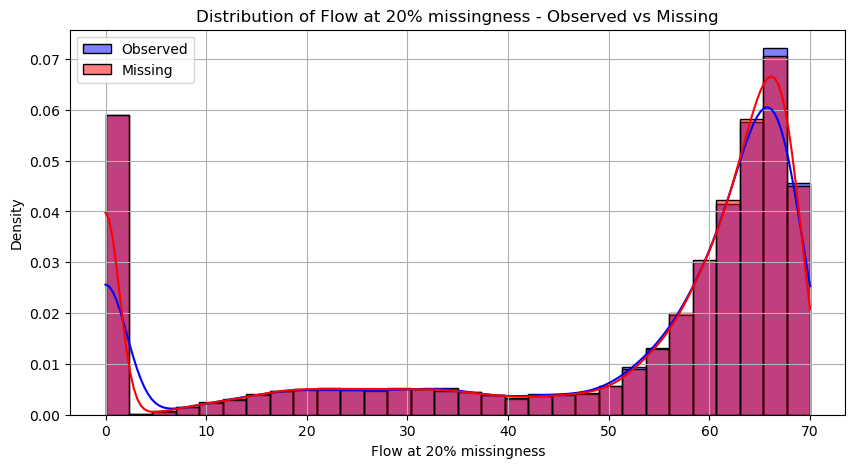

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_missing_vs_observed(data, mask, feature_name="flow"):
    """
    data: 1D array of original values
    mask: 1D boolean array, True if missing
    feature_name: for labeling
    """
    data_missing = data[mask]
    data_observed = data[~mask]

    plt.figure(figsize=(10, 5))
    sns.histplot(data_observed, color='blue', label='Observed', kde=True, stat="density", bins=30)
    sns.histplot(data_missing, color='red', label='Missing', kde=True, stat="density", bins=30)
    plt.title(f"Distribution of {feature_name} - Observed vs Missing")
    plt.xlabel(feature_name)
    plt.ylabel("Density")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_missing_vs_observed(X_val_full_unscaled_seq_tensor[0].flatten(), val_masks_seq[0][90].flatten(), feature_name="Flow at 20% missingness")

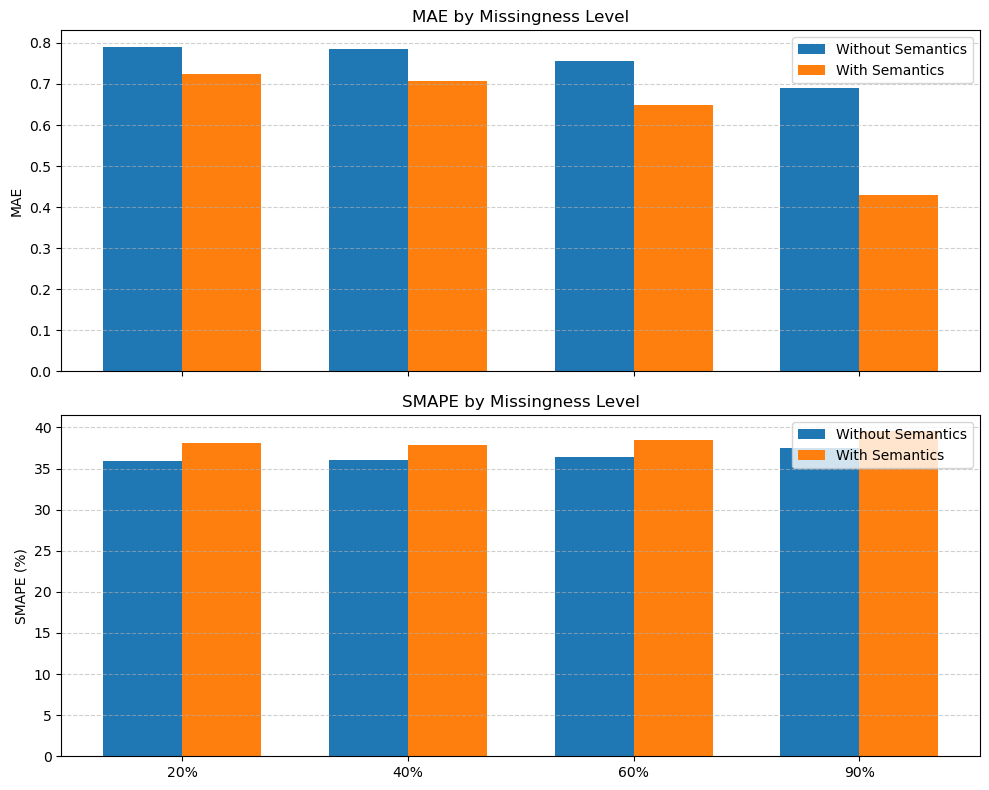

In [44]:
import matplotlib.pyplot as plt
import numpy as np

# Example error values (replace with your real variables)
missing_levels = ['20%', '40%', '60%', '90%']

# Bar chart setup
x = np.arange(len(missing_levels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# --- MAE plot ---
ax[0].bar(x - width/2, r2_all.values(), width, label='Without Semantics', color='tab:blue')
ax[0].bar(x + width/2, avg_r2_cluster.values(), width, label='With Semantics', color='tab:orange')
ax[0].set_ylabel('MAE')
ax[0].set_title('MAE by Missingness Level')
ax[0].legend()
ax[0].grid(True, axis='y', linestyle='--', alpha=0.6)

# --- SMAPE plot ---
ax[1].bar(x - width/2, smape_all.values(), width, label='Without Semantics', color='tab:blue')
ax[1].bar(x + width/2, avg_smape_cluster.values(), width, label='With Semantics', color='tab:orange')
ax[1].set_ylabel('SMAPE (%)')
ax[1].set_title('SMAPE by Missingness Level')
ax[1].set_xticks(x)
ax[1].set_xticklabels(missing_levels)
ax[1].legend()
ax[1].grid(True, axis='y', linestyle='--', alpha=0.6)

fig.tight_layout()
plt.show()
